# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### SAVING FUZZY LOGIC MODEL

The fuzzy logic done in the previous notebook will be save into a pickle file.

For Fuzzy Logic, the library "skfuzzy" was used. See https://pythonhosted.org/scikit-fuzzy/ for documentations. 
Basic Memembership functions like Triangular and Trapezoidal functions will be used.

Generic Function Steps:
1. Create Input & Output Membership Functions
2. Finding the Degree of membership for input values using the respective membership function.
3. Combine aggregate rules and find the Healh Score.

Class "Fuzzy_Health" will be defined.

In [1]:
# Import library

import numpy as np
import skfuzzy as fuzz # scikit-fuzzy (Version 2.0)
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [55]:
def Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text):
    '''Create and plots Fuzzy 3 value (Low, mid, high) membership functions (two trapezoid for HIGH and LOW, one triangle for MID):
    Inputs: 
    - max_val, min_val, step of the range
    - list_of_range: [low value, mid value, high value]
    - list_of_label: list of Text labels/Meanings for Low, Mid and High, [low,mid,high]
    - plot_text: list of str For plotting, [name, x_label]
    
    Returns: Dict - {"low":mf_name_low, 
                    "mid":mf_name_mid, 
                    "high":mf_name_high}
                    
    Plots out the shape of the mfs for visualisation
    '''
    
    # Specifying x range:
    x_name = np.arange(min_val,max_val, step)
    low, mid, high = list_of_range[0],list_of_range[1],list_of_range[2]

    # Specifying Membership Function:
    mf_name_low = fuzz.trapmf(x_name,[min_val,min_val,low,mid])
    mf_name_mid = fuzz.trimf(x_name,[low,mid,high])
    mf_name_high = fuzz.trapmf(x_name,[mid,high,max_val,max_val])

    # Visualising the Membership Function:
    plt.figure(figsize=(10,5))
    plt.plot(x_name, mf_name_low, 'r', linewidth=1.5, label=list_of_label[0])
    plt.plot(x_name, mf_name_mid, 'b', linewidth=1.5, label=list_of_label[1])
    plt.plot(x_name, mf_name_high, 'g', linewidth=1.5, label=list_of_label[2])

    plt.title('Membership Functions for '+plot_text[0])
    plt.ylabel('Membership')
    plt.xlabel(plot_text[1])
    plt.legend()
    plt.show()
    
    return {'low':mf_name_low,'mid':mf_name_mid,'high':mf_name_high}
    

### Define Individual Membership Functions

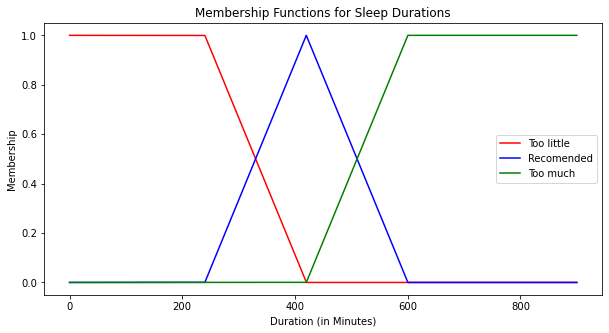

In [56]:
# Creating Fuzzy membership functions:

# For Sleep Durations (which recomended is 7 hours):
# "Too little", x < 5 hours, Trapezoid membership function
# "Recomended" , 4<=7<=10 hours, Triangle membership function
# "Too much" , x > 9 hours, Trapezoid membership function

min_val = 0
max_val = 15*60
step = 0.01
list_of_range = [4*60,7*60,10*60] # in minutes
list_of_label = ["Too little","Recomended","Too much"]
plot_text = ["Sleep Durations","Duration (in Minutes)"]

x_sleep_duration = np.arange(min_val,max_val, step)
mf_sleep_duration = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


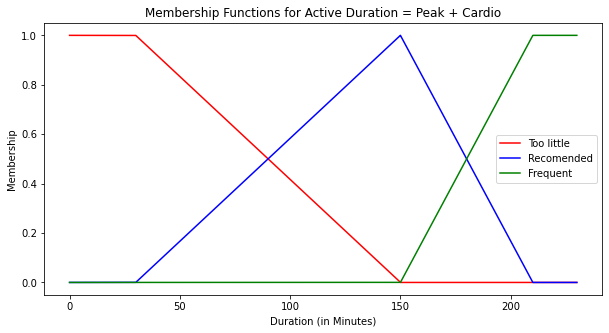

In [58]:
# Creating Fuzzy membership functions:

# For Active Duration = Peak_minutes + Cardio_minutes (which recomended is 150 minutes/ week, 30 mins for 5 days):
# "Little", x < 30 mins, Trapezoid membership function
# "Recomended" , 30<=150<=210 mins, Triangle membership function
# "Frequent" , x > 210 mins, Trapezoid membership function

min_val = 0
max_val = 230
step = 0.01
list_of_range = [30,150,210] # in minutes
list_of_label = ["Too little","Recomended","Frequent"]
plot_text = ["Active Duration = Peak + Cardio","Duration (in Minutes)"]

x_active_duration = np.arange(min_val,max_val, step)
mf_active_duration = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


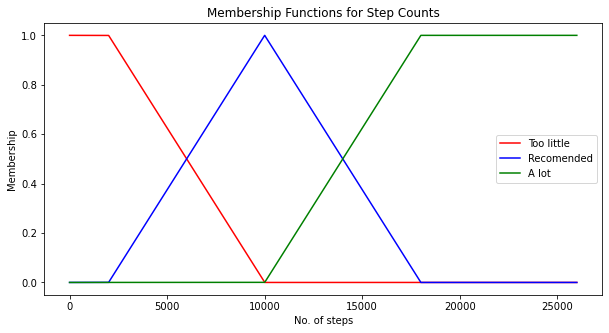

In [59]:
# Creating Fuzzy membership functions:

# For Number of Steps (which recomended is 10000):
# "Too little", x < 2000 hours, Trapezoid membership function
# "Recomended" , 2000 <=10000<=20000 hours, Triangle membership function
# "A lot" , x > 18000, Trapezoid membership function

min_val = 0
max_val = 26000
step = 1
list_of_range = [2000,10000,18000]
list_of_label = ["Too little","Recomended","A lot"]
plot_text = ["Step Counts","No. of steps"]

x_step_counts = np.arange(min_val,max_val, step)
mf_step_counts = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


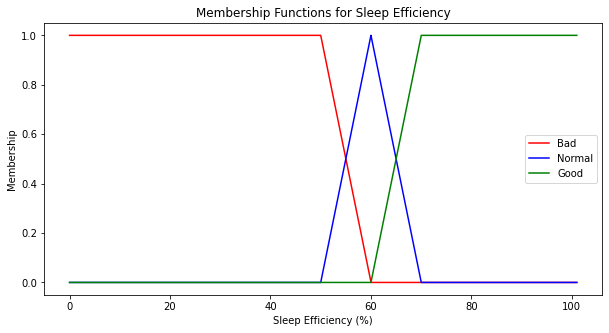

In [60]:
# Creating Fuzzy membership functions:

# For Sleep Efficiency (The higher the better):
# "Bad", x < 50 %, Trapezoid membership function
# "Normal" , 50<=60<=70 hours, Triangle membership function
# "Good" , x > 70, Trapezoid membership function

min_val = 0
max_val = 101
step = 0.01
list_of_range = [50,60,70]
list_of_label = ["Bad","Normal","Good"]
plot_text = ["Sleep Efficiency","Sleep Efficiency (%)"]

x_sleep_efficiency = np.arange(min_val,max_val, step)
mf_sleep_efficiency = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


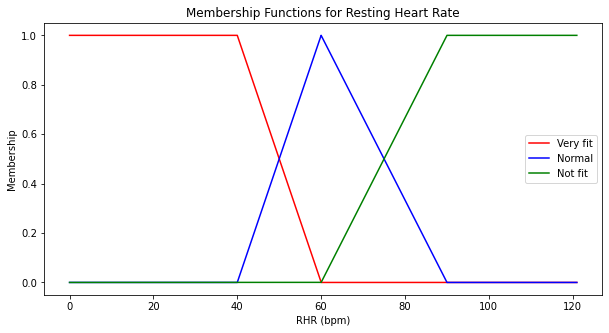

In [61]:
# Creating Fuzzy membership functions:

# For RHR (40 bpm  (very healthy), 50 - 70 (Normal), > 90 (unhealthy)):
# "Very fit", x < 40 bpm, Trapezoid membership function
# "Normal" , 40<=60<=90 hours, Triangle membership function
# "Not fit" , x > 90, Trapezoid membership function

min_val = 0
max_val = 121
step = 0.01
list_of_range = [40,60,90]
list_of_label = ["Very fit","Normal","Not fit"]
plot_text = ["Resting Heart Rate","RHR (bpm)"]

x_rhr = np.arange(min_val,max_val, step)
mf_rhr = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


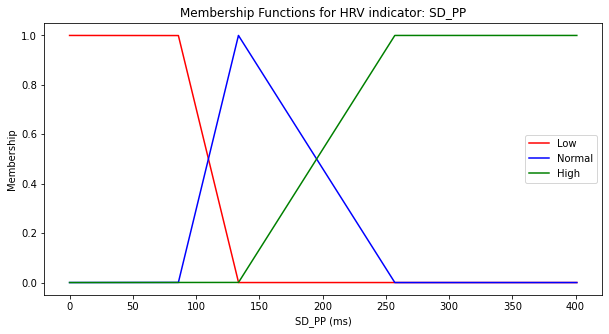

In [62]:
# Creating Fuzzy membership functions:

# For HRV indicator, SD_PP (The higher the better):
# "Low", x < 86 ms, Trapezoid membership function
# "Normal" , 86<=133.5<=257 ms, Triangle membership function
# "High" , x > 257 ms, Trapezoid membership function

min_val = 0
max_val = 401
step = 0.01
list_of_range = [86,133.5,257]
list_of_label = ["Low","Normal","High"]
plot_text = ["HRV indicator: SD_PP","SD_PP (ms)"]

x_SD_PP = np.arange(min_val,max_val, step)
mf_SD_PP = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


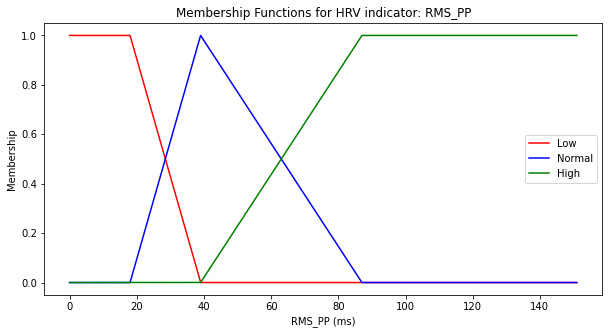

In [63]:
# Creating Fuzzy membership functions:

# For HRV indicator, RMS_PP (The higher the better):
# "Low", x < 18 ms, Trapezoid membership function
# "Normal" , 18<=39<=87 ms, Triangle membership function
# "High" , x > 87 ms, Trapezoid membership function

min_val = 0
max_val = 151
step = 0.01
list_of_range = [18,39,87]
list_of_label = ["Low","Normal","High"]
plot_text = ["HRV indicator: RMS_PP","RMS_PP (ms)"]

x_RMS_PP = np.arange(min_val,max_val, step)
mf_RMS_PP = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


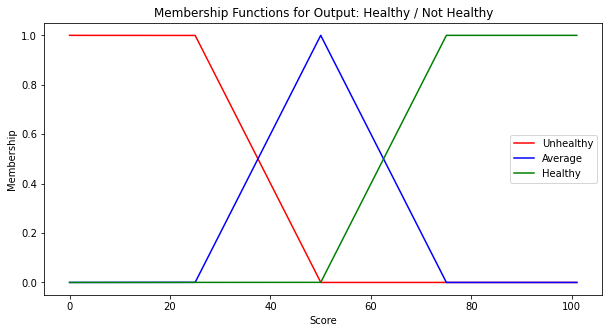

In [64]:
# Creating Fuzzy membership functions for Output:

# Output Function: HEALTHY or NOT HEALTHY
# "Unhealthy", x < 25, Trapezoid membership function
# "Average" , 25<=50<=75, Triangle membership function
# "Healthy" , x > 75, Trapezoid membership function

min_val = 0
max_val = 101
step = 0.01
list_of_range = [25,50,75]
list_of_label = ["Unhealthy","Average","Healthy"]
plot_text = ["Output: Healthy / Not Healthy","Score"]

x_health_score = np.arange(min_val,max_val, step)
mf_health_score = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


### Defining Functions

In [65]:
# Using the same key as above INPUT_DICT:

# Membership Functions:

MF_DICT = {
'sleep_duration' : mf_sleep_duration,
'sleep_efficiency' : mf_sleep_efficiency,
'active_duration' : mf_active_duration,
'step_counts' : mf_step_counts, 
'rhr' : mf_rhr,
'SD_PP' : mf_SD_PP,
'RMS_PP' : mf_RMS_PP
}

In [66]:
# Using the same key as above INPUT_DICT:

# X Ranges for each variable:

X_RANGE_DICT = {
'sleep_duration' : x_sleep_duration,
'sleep_efficiency' : x_sleep_efficiency,
'active_duration' : x_active_duration,
'step_counts' : x_step_counts, 
'rhr' : x_rhr,
'SD_PP' : x_SD_PP,
'RMS_PP' : x_RMS_PP
}

In [67]:
# Finding the degree of membership for the respective Inputs:

def find_input_degree(INPUT_DICT,X_RANGE_DICT,MF_DICT):
    # Degree of Membership Dict:
    DEGREE_DICT = {}

    for xxx in INPUT_DICT.keys():
        DEGREE_DICT[xxx] = {
            'low' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['low'],INPUT_DICT[xxx]),
            'mid' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['mid'],INPUT_DICT[xxx]),
            'high': fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['high'],INPUT_DICT[xxx])
            }
    return DEGREE_DICT

## Defining Fuzzy Rules (Can be ajusted whenever there are more expert inputs / complex combination)


## Method #1:
### Combining all the variables to give the overall health score.

#### Mapping the input membership functions to the result membership function using Fuzzy Operators: 
(OR = Union = np.fmax, AND = Intersect = np.fmin) ->float, element-wise comparison

- Rule 1: If EITHER 
        - Sleep Duration is High OR Low, 
        - Active duration, sleep_efficiency, SD_PP, RMS_PP is Low, 
        - RHR is High, the person is Unhealthy.
- Rule 2: If all the variables are at the Recommended / Normal amount, health is Average.
- Rule 3: Only If the 
        - Active Duration and Step counts are at Recommended amount OR higher,
        - AND the Sleep duration is at recommended amount,
        - AND the RHR is Low,
        - AND the rest of the variables are HIGH, the person is Healthy.

In [68]:
def find_fuzzy_score(DEGREE_DICT):
    
# Applying the Fuzzy Rule #1, IF either one is Low or RHR is high, Healthy = low:

    degree_list = [DEGREE_DICT[i]['low'] for i in DEGREE_DICT.keys() if i is not 'rhr' and i is not 'sleep_duration'] 
    # all the low degree that is unhealthy

    rule_1 = 0 # initialize
    rule_2 = 0 # initialize
    rule_3 = 1 # initialize

    for i in range(len(degree_list)-1): # since np.fmax / np.min only takes 2 input at a time
        rule_1 = np.fmax(rule_1,np.fmax(degree_list[i],degree_list[i+1]))

    # taking the max of the the rest and the last indicators:
    rule_1 = np.fmax(DEGREE_DICT['rhr']['high'],rule_1)
    rule_1 = np.fmax(rule_1,
                    np.fmax(DEGREE_DICT['sleep_duration']['low'],
                           DEGREE_DICT['sleep_duration']['high'])
                    )

    # Map over to Output membership function (by Intersection) / clipping away the Output function:
    degree_health_score_low = np.fmin(rule_1,mf_health_score['low'])

# Applying the Fuzzy Rule #2, IF either one is mid, Healthy = mid:

    degree_list = [DEGREE_DICT[i]['mid'] for i in DEGREE_DICT.keys() if i is not 'rhr'] # all the low degree that is unhealthy

    for i in range(len(degree_list)-1): # since np.fmax / np.min only takes 2 input at a time
        rule_2 = np.fmax(rule_2,np.fmax(degree_list[i],degree_list[i+1]))

    # taking the max of the the rest and the last indicator:
    rule_2 = np.fmax(DEGREE_DICT['rhr']['mid'],rule_2)

    # Map over to Output membership function (by Intersection):
    degree_health_score_mid = np.fmin(rule_2,mf_health_score['mid'])

# Applying the Fuzzy Rule #3, 
    # IF sleep_duration = mid 
    # AND active_duration, step_counts = mid OR high
    # AND RHR is Low 
    # AND the rest = High, Healthy = High:

    # Intersect of All the degree 'High':
    rule_3a = np.fmin(DEGREE_DICT['sleep_efficiency']['high'],
                      np.fmin(DEGREE_DICT['SD_PP']['high'],DEGREE_DICT['RMS_PP']['high']))

    # Intersect for active_duration, step_counts = mid OR high
    rule_3b = np.fmin(np.fmax(DEGREE_DICT['active_duration']['high'],DEGREE_DICT['active_duration']['mid']),
                      np.fmax(DEGREE_DICT['step_counts']['high'],DEGREE_DICT['step_counts']['mid']))

    # Combine Intersect with RHR = low, rule_3a, rule_3b
    rule_3 = np.fmin(DEGREE_DICT['rhr']['low'],
                     np.fmin(rule_3a , rule_3b))

    # Mapping over to Output membership function (by Intersection):
    degree_health_score_high = np.fmin(rule_3,mf_health_score['high'])

    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(degree_health_score_low, 
                         np.fmax(degree_health_score_mid, degree_health_score_high))

    # Calculate defuzzified result:
    Health_Score = fuzz.defuzz(x_health_score, aggregated, 'centroid')
    plot_line_health = fuzz.interp_membership(x_health_score, aggregated, Health_Score)  # for plotting

    # find the degree of health from the DeFuzzified value
    # find the pair the plot line intersects
    # Output example: 0.8 healthy, 0.2 Average

    fz_health_score_low = fuzz.interp_membership(x_health_score,mf_health_score['low'], Health_Score)
    fz_health_score_mid = fuzz.interp_membership(x_health_score,mf_health_score['mid'], Health_Score)
    fz_health_score_high = fuzz.interp_membership(x_health_score,mf_health_score['high'], Health_Score)
    
    details = (fz_health_score_low, fz_health_score_mid,fz_health_score_high,
               degree_health_score_low,degree_health_score_mid,degree_health_score_high,
               aggregated,plot_line_health
              )
    
    return Health_Score,details

In [69]:
def print_health_score(Health_Score,details,method,SCORE_DEGREE_DICT=None):
    
    # Printing out the overall result:
    print("\nThe Aggregated Health Score is:", np.round(Health_Score,3))
    print("\nDegree:\nHealth Unhealthy:", np.round(details[0],3))
    print("Health Average:", np.round(details[1],3))
    print("Health Healthy:", np.round(details[2],3))
    
    if method == 2 and SCORE_DEGREE_DICT != None:
        # Printing out the breakdown score:
        print("\nBreakdown Score:")
        for xxx in score:
            print(xxx+':',np.round(SCORE_DEGREE_DICT[xxx]['Score'],3))

    # Visualize the result:
    plt.figure(figsize=(10,5))

    plt.plot(x_health_score, details[3], '--r', linewidth=1.5, label='Unhealthy')
    plt.plot(x_health_score, details[4], '--b', linewidth=1.5, label='Average')
    plt.plot(x_health_score, details[5], '--g', linewidth=1.5, label='Healthy')

    plt.fill_between(x_health_score, np.zeros_like(x_health_score), details[6], facecolor='Orange', alpha=0.7)

    plt.plot([Health_Score, Health_Score], [0, details[7]], 'k', linewidth=1.5, alpha=0.9)

    plt.title('Aggregated Health membership function and result (line)')
    plt.xlabel('Score')
    plt.ylabel('Membership')
    plt.legend()
    plt.show()

### Function for Recomending Actions:

In [70]:
# Creating a matchup table from "Deg_Variables":

def match_action(x):
    if x['low'] >= 0.65 and x.name != 'rhr': # Majority Low for any indicators Except RHR is Unhealthy
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'rhr': # Majority High for RHR is Unhealthy
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'sleep_duration': # Majority High for RHR is Unhealthy
        return "Sleep too much"
    else:
        return "OK"

def recommend(DEGREE_DICT):
    import matplotlib.pyplot as plt
    
    # Putting into Dataframe for easier comparison
    Deg_Variables = pd.DataFrame(DEGREE_DICT)

    # View by catagory
    active_col = ['active_duration','step_counts']
    sleep_col = ['sleep_duration','sleep_efficiency']
    heart_col = ['rhr','SD_PP','RMS_PP']
    
    plots = {'Activity':active_col,'Sleep':sleep_col,'Heart Health':heart_col}

    print("HEALTH STATUS:")
    
    for p in plots.keys():
        Deg_Variables[plots[p]].transpose().plot.barh(stacked=True,figsize=(10,5),title="Fuzzy Membership Degree of "+p.upper())
    plt.show()
    
    # Print Health Status: 
    print("RECOMENDATIONS:")
    for p in plots.keys():
        print('\n'+p,':\n'+'='*15)
        action = Deg_Variables[plots[p]].transpose().apply(match_action,axis=1)

        for i in plots[p]:
            print("{}.....\t{}".format(i.ljust(20), action.loc[i]))


## Method #2:
### Splitting the variables to compute serperate scores:

In comparison, the Overall Health Score can still be Split into the following:
- Active Score
- Sleep Score
- Heart Score

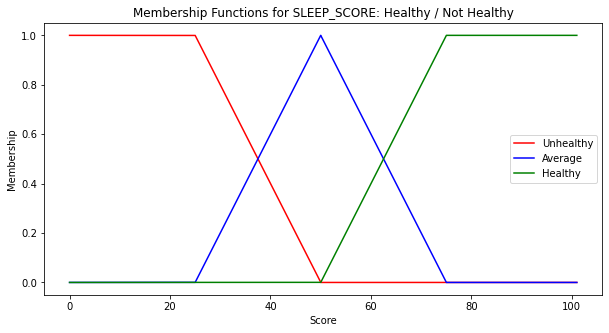

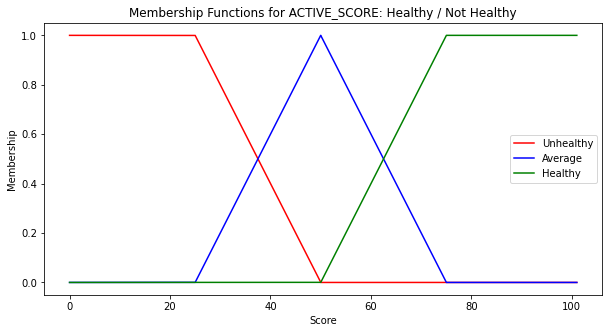

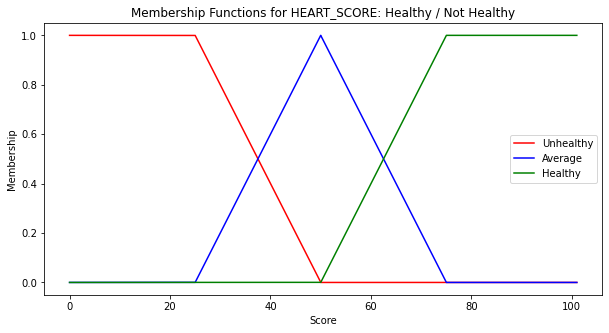

In [71]:
# Creating the Membership Function:

MF_Sub_Score = {}
min_val = 0
max_val = 101
step = 0.01
list_of_range = [25,50,75]
list_of_label = ["Unhealthy","Average","Healthy"]
x_range = np.arange(min_val,max_val, step)

score = ['sleep_score','active_score','heart_score']

for s in score:

    plot_text = [s.upper()+": Healthy / Not Healthy","Score"]
    MF_Sub_Score[s] = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


### Getting Health Score from Method 2:

In [72]:
def method_2(DEGREE):
    # Applying Fuzzy similar to Health but for Sleep, Activity and Heart:
    active_col = ['active_duration','step_counts']
    sleep_col = ['sleep_duration','sleep_efficiency']
    heart_col = ['rhr','SD_PP','RMS_PP']

    SCORE_DEGREE_DICT = {}
    plots = {score[0]:sleep_col,score[1]:active_col,score[2]:heart_col}
    
    Deg_Variables_T = pd.DataFrame(DEGREE).transpose()

    # FOR SLEEP ['sleep_duration','sleep_efficiency']:

    xxx = 'sleep_score'

    DEGREE_DICT = {}

    # Rule 1: Union (duration = Low OR High) OR sleep Efficiency = Low, score = low:
    rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                      np.fmax(Deg_Variables_T.loc[plots[xxx][0],'low'],
                              Deg_Variables_T.loc[plots[xxx][0],'high']))

    DEGREE_DICT['low'] = np.fmin(rule_1,MF_Sub_Score[xxx]['low'])

    # Rule 2: Union of All the degree 'Mid', score = Mid:
    rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                      Deg_Variables_T.loc[plots[xxx][1],'mid'])

    DEGREE_DICT['mid'] = np.fmin(rule_2,MF_Sub_Score[xxx]['mid'])

    # For Sleep Rule 3: Intersect of Sleep duration = Mid, Efficiency = Mid or High , Score = High:
    rule_3 = np.fmin(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                     Deg_Variables_T.loc[plots[xxx][1],'mid']) 
    #                  np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
    #                           Deg_Variables_T.loc[plots[xxx][1],'mid']))

    DEGREE_DICT['high'] = np.fmin(rule_3,MF_Sub_Score[xxx]['high'])

    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(DEGREE_DICT['low'], 
                         np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

    # Calculate defuzzified result:
    DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

    # Store in a Dict for all the scores:
    SCORE_DEGREE_DICT[xxx] = DEGREE_DICT


    # FOR Activity ['active_duration','step_counts']:

    xxx = 'active_score'

    DEGREE_DICT = {}

    # Rule 1: Union duration = Low OR step count = Low, score = low:
    rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                     Deg_Variables_T.loc[plots[xxx][0],'low'])

    DEGREE_DICT['low'] = np.fmin(rule_1,MF_Sub_Score[xxx]['low'])

    # Rule 2: Union of All the degree 'Mid', score = Mid:
    rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                      Deg_Variables_T.loc[plots[xxx][1],'mid'])

    DEGREE_DICT['mid'] = np.fmin(rule_2,MF_Sub_Score[xxx]['mid'])

    # For Sleep Rule 3: Intersect of duration and step count = Mid or High, Score = High:
    rule_3 = np.fmin(np.fmax(Deg_Variables_T.loc[plots[xxx][0],'high'],
                      Deg_Variables_T.loc[plots[xxx][0],'mid']),
                     np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
                      Deg_Variables_T.loc[plots[xxx][1],'mid']))

    DEGREE_DICT['high'] = np.fmin(rule_3,MF_Sub_Score[xxx]['high'])

    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(DEGREE_DICT['low'], 
                         np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

    # Calculate defuzzified result:
    DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

    # Store in a Dict for all the scores:
    SCORE_DEGREE_DICT[xxx] = DEGREE_DICT


    # FOR Heart Health ['rhr','SD_PP','RMS_PP']:

    xxx = 'heart_score'

    DEGREE_DICT = {}

    # Rule 1: Union SD_PP OR RMS_PP = low OR RHR = High, score = low:
    rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'high'],
                     np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                             Deg_Variables_T.loc[plots[xxx][2],'low']))

    DEGREE_DICT['low'] = np.fmin(rule_1,MF_Sub_Score[xxx]['low'])

    # Rule 2: Union of All the degree 'Mid', score = Mid:
    rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                     np.fmax(Deg_Variables_T.loc[plots[xxx][1],'mid'],
                             Deg_Variables_T.loc[plots[xxx][2],'mid']))

    DEGREE_DICT['mid'] = np.fmin(rule_2,MF_Sub_Score[xxx]['mid'])

    # For Sleep Rule 3: Intersect of duration and RHR = Low AND SD_PP, RMS_PP = High, Score = High:
    rule_3 = np.fmin(Deg_Variables_T.loc[plots[xxx][0],'low'],
                     np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
                             Deg_Variables_T.loc[plots[xxx][2],'high']))

    DEGREE_DICT['high'] = np.fmin(rule_3,MF_Sub_Score[xxx]['high'])

    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(DEGREE_DICT['low'], 
                         np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

    # Calculate defuzzified result:
    DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

    # Store in a Dict for all the scores:
    SCORE_DEGREE_DICT[xxx] = DEGREE_DICT


    # OVERALL HEALTH SCORE (combine fuzzy scores):

    # Finding the Degree of membership:

    for xxx in score:
        SCORE_DEGREE_DICT[xxx]['low'] = fuzz.interp_membership(x_range,MF_Sub_Score[xxx]['low'],SCORE_DEGREE_DICT[xxx]['Score'])
        SCORE_DEGREE_DICT[xxx]['mid'] = fuzz.interp_membership(x_range,MF_Sub_Score[xxx]['mid'],SCORE_DEGREE_DICT[xxx]['Score'])
        SCORE_DEGREE_DICT[xxx]['high'] = fuzz.interp_membership(x_range,MF_Sub_Score[xxx]['high'],SCORE_DEGREE_DICT[xxx]['Score'])

    # Applying Fuzzy Rules:
    # Rule 1: Sleep OR Activity OR Heart Score is Low, score = Low:

    rule_1 = np.fmax(SCORE_DEGREE_DICT[score[0]]['low'],
                     np.fmax(SCORE_DEGREE_DICT[score[1]]['low'],
                             SCORE_DEGREE_DICT[score[2]]['low']))

    # Mapping over to Output membership function (by Intersection):
    degree_health_score_low = np.fmin(rule_1,mf_health_score['low'])

    # Rule 2: Sleep OR Activity OR Heart Score is Mid, score = Mid:
    rule_2 = np.fmax(SCORE_DEGREE_DICT[score[0]]['mid'],
                     np.fmax(SCORE_DEGREE_DICT[score[1]]['mid'],
                             SCORE_DEGREE_DICT[score[2]]['mid']))

    degree_health_score_mid = np.fmin(rule_2,mf_health_score['mid'])

    # For Sleep Rule 3: Sleep AND Activity AND Heart Score is High, Score = High:
    rule_3 = np.fmax(SCORE_DEGREE_DICT[score[0]]['high'],
                     np.fmax(SCORE_DEGREE_DICT[score[1]]['high'],
                             SCORE_DEGREE_DICT[score[2]]['high']))

    degree_health_score_high = np.fmin(rule_3,mf_health_score['high'])


    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(degree_health_score_low, 
                         np.fmax(degree_health_score_mid, degree_health_score_high))

    # Calculate defuzzified result:
    Health_Score = fuzz.defuzz(x_health_score, aggregated, 'centroid')
    plot_line_health = fuzz.interp_membership(x_health_score, aggregated, Health_Score)  # for plotting

    # find the degree of health from the DeFuzzified value
    # find the pair the plot line intersects
    # Output example: 0.8 healthy, 0.2 Average

    fz_health_score_low = fuzz.interp_membership(x_health_score,mf_health_score['low'], Health_Score)
    fz_health_score_mid = fuzz.interp_membership(x_health_score,mf_health_score['mid'], Health_Score)
    fz_health_score_high = fuzz.interp_membership(x_health_score,mf_health_score['high'], Health_Score)
    
    details = (fz_health_score_low, fz_health_score_mid,fz_health_score_high,
               degree_health_score_low,degree_health_score_mid,degree_health_score_high,
               aggregated,plot_line_health
              )
    
    return Health_Score,details,SCORE_DEGREE_DICT

In comparison of the 2 methods, Method #2 seems to give a better representation of the health state when the input is all average. It is also easier to adjust the rules within the groups itself. However, if required, it will be harder to cater "weights" with reference to each variable.

In [73]:
# adapted from https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

def plot_spider_chart(labels,breakdown_val,overall_score):
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    breakdown_val=np.concatenate((breakdown_val,[breakdown_val[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, breakdown_val, 'o-', linewidth=2)
    ax.fill(angles, breakdown_val, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Overall Health Score:'+str(overall_score))
    ax.grid(True)

### Creating Class to save the Model

In [1]:
class FUZZY_HEALTH_MODEL():
    
    def __init__(self,X,MF):
        self.MF_DICT = MF
        self.X_RANGE_DICT = X
        self.DEGREE_DICT = {}
        
    def fuzzify_input(self,INPUT_DICT):
        self.DEGREE_DICT = find_input_degree(INPUT_DICT,self.X_RANGE_DICT,self.MF_DICT)
        return self.DEGREE_DICT
    
    def get_health_score_m1(self):
        self.fuzzy_health_score = find_fuzzy_score(self.DEGREE_DICT)
        return self.fuzzy_health_score[0]
    
    def get_health_score_m2(self):
        self.fuzzy_health_score = method_2(self.DEGREE_DICT)
        return self.fuzzy_health_score[0]
    
    def print_health_score(self,method):
        health_score = self.fuzzy_health_score[0]
        details = self.fuzzy_health_score[1]
        Break_down = None
        if method == 2:
            Break_down = self.fuzzy_health_score[2]
        
        print_health_score(health_score,details,method,Break_down)
        
    def recomend(self):
        recommend(self.DEGREE_DICT)
        
        # print Spider Chart:
        df = pd.DataFrame(self.DEGREE_DICT).copy()
        df['rhr'].low = df['rhr'].high # swap as the lower the better
        int_values = df.transpose()
        int_values.low = int_values.low*1
        int_values.mid = int_values.mid*5
        int_values.high = int_values.high*10
        int_values = int_values.sum(axis=1)

        plot_spider_chart(df.columns.tolist(),int_values.values,self.fuzzy_health_score[0])

In [75]:
# Declaring Instance of Class:
METHOD_1 = FUZZY_HEALTH_MODEL(X_RANGE_DICT,MF_DICT)

In [76]:
############# CHANGE HERE !!! #########

# Input Values:
INPUT_DICT = {
'sleep_duration' : 6*60, # in minutes / per day
'sleep_efficiency' : 80, # in percent
'active_duration' : 80, # in minutes / week
'step_counts' : 10000, 
'rhr' : 60, # in bpm
'SD_PP' : 200, # in mili-seconds
'RMS_PP' : 70 # in mili-seconds
}

# Run all below to find the Health Score.


The Aggregated Health Score is: 35.563

Degree:
Health Unhealthy: 0.577
Health Average: 0.423
Health Healthy: 0.0


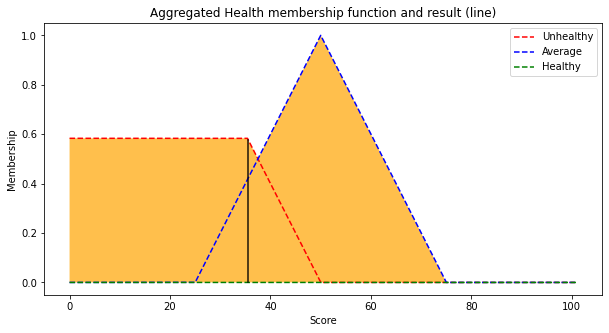

HEALTH STATUS:


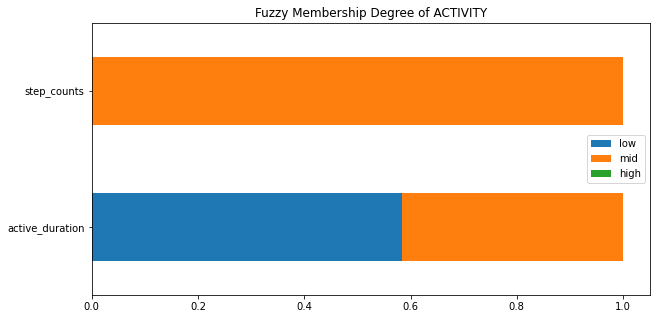

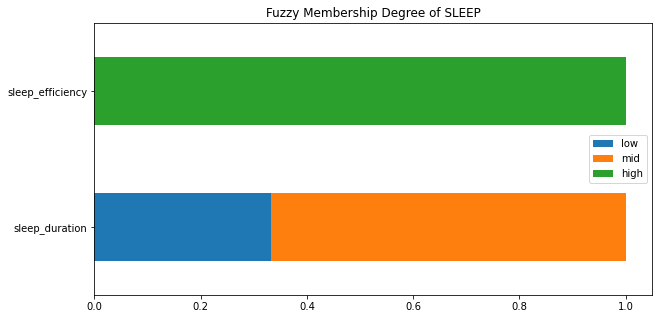

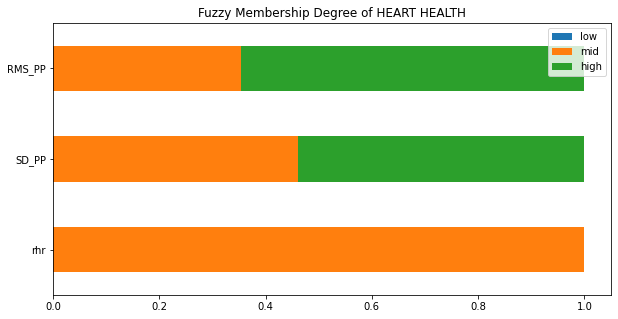

RECOMENDATIONS:

Activity :
active_duration     .....	OK
step_counts         .....	OK

Sleep :
sleep_duration      .....	OK
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


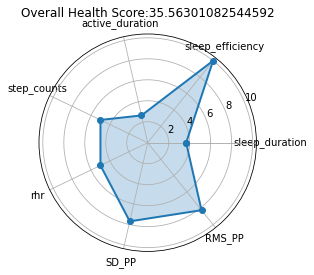

In [77]:
METHOD_1.fuzzify_input(INPUT_DICT)
METHOD_1.get_health_score_m1()
METHOD_1.print_health_score(method=1)
METHOD_1.recomend()

In [78]:
# Declaring Instance of Class:

METHOD_2 = FUZZY_HEALTH_MODEL(X_RANGE_DICT,MF_DICT)


The Aggregated Health Score is: 38.109

Degree:
Health Unhealthy: 0.476
Health Average: 0.524
Health Healthy: 0.0

Breakdown Score:
sleep_score: 39.251
active_score: 46.961
heart_score: 50.0


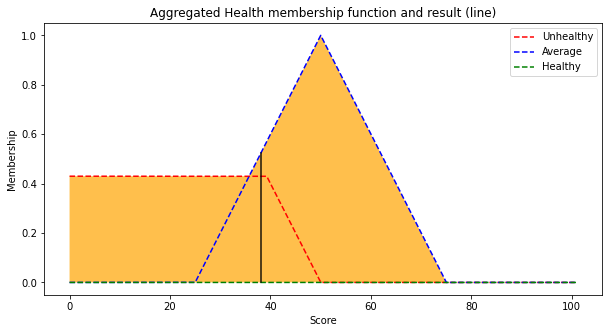

HEALTH STATUS:


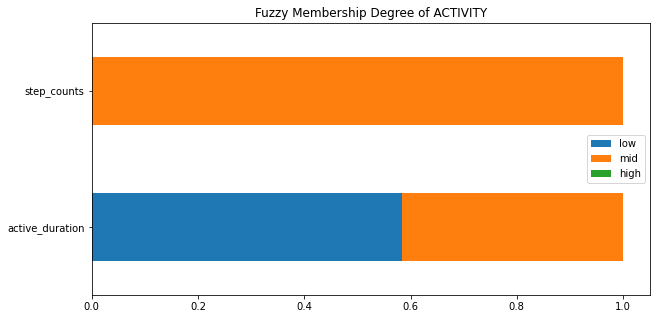

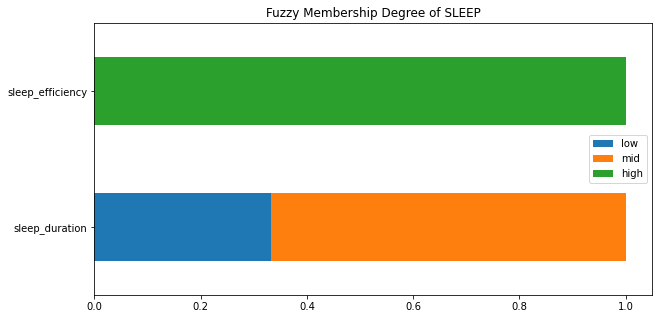

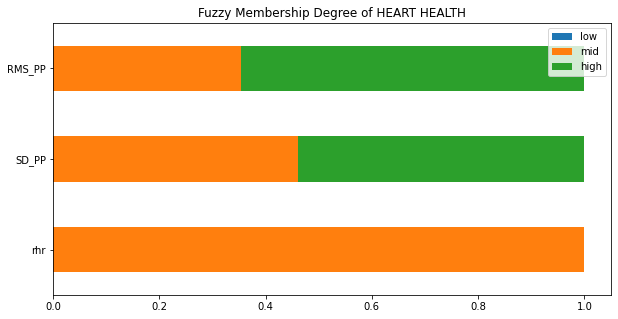

RECOMENDATIONS:

Activity :
active_duration     .....	OK
step_counts         .....	OK

Sleep :
sleep_duration      .....	OK
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


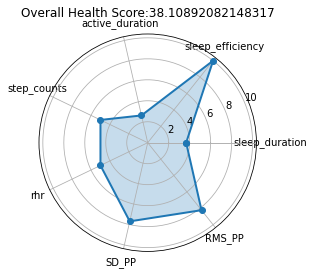

In [79]:
METHOD_2.fuzzify_input(INPUT_DICT)
METHOD_2.get_health_score_m2()
METHOD_2.print_health_score(method=2)
METHOD_2.recomend()

### Saving the model as pickel file
Get Health Score is save into a pickle file for application to the data from PERSON1 & 2.

In [80]:
import os

current_directory = os.getcwd()

folder_path = os.path.join(current_directory,"FUZZY_SCORE_MODEL") # Change dirctory Here

pickle_list = {
                'Method_1': METHOD_1,
                'Method_2': METHOD_2
                }

# Save to Pickle:
for i in pickle_list.keys():
    file = os.path.join(folder_path, str(i)+'.pickle')
    with open(file,'wb') as f:
        pickle.dump(obj=pickle_list[i],file=f)


Next: 

1. Using this score to suggest some actions to improve health. DONE.
2. Find why HRV has correlation 1. DONE.
3. Exploration of other the dataset and unsupervised clustering
4. Do the same fuzzy logic thing